In [13]:
import warnings

warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\abajpai\\Documents\\UPGRAD\\DATA TOOLKIT\\Python  for Datascience\\IMDB'

In [3]:
## Helps you to view all the columns over jupyter notebook without any trunction
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv("Youtube_clean.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_date,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Prb_osSVE0M,14-11-2017,Renu Desai Gives Rating For Pawan kalyan As Hu...,ABN Telugu,25,13-11-2017,156085,716,53,0,True,False,False
1,1kuJkA9usqg,14-11-2017,"Deivamagal Episode 1387, 13/11/17",VikatanTV,24,13-11-2017,387221,2159,1214,711,False,False,False
2,znOC3IU0dF8,14-11-2017,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,13-11-2017,55178,45,94,15,False,False,False
3,z3V9LUA6VQM,14-11-2017,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,12-11-2017,236710,858,197,66,False,False,False
4,gW4Su5wq0b8,14-11-2017,Neeya Naana - 12th November 2017 - Promo 2,Vijay Television,24,11-11-2017,261202,1971,126,201,False,False,False


In [5]:
# Let's convert View and Likes column to Million Views and Likes

df['views'] = df['views']/1000000
df['likes'] = df['likes']/1000000

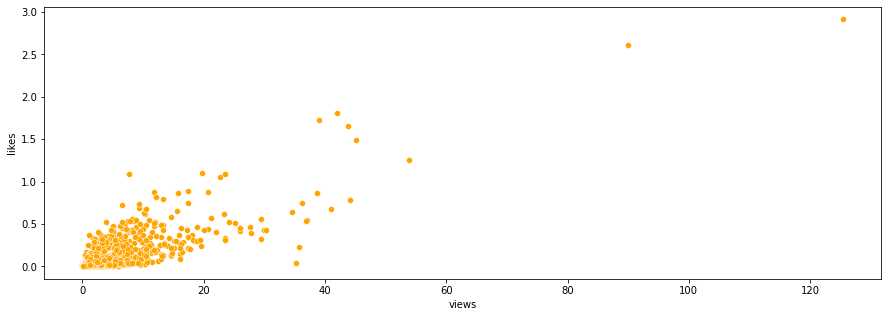

In [6]:
plt.figure(figsize=[15,5])
#sns.jointplot(x = 'views', y = 'likes', data =df, color='purple')
sns.scatterplot(data=df, x="views", y="likes", color ='orange')
plt.show()

- As the views count is increasing the likes count is also increasing.
- You have some videos with very high views and likes
- There are two videos with good views but not so good likes
- There is a video with less views and very high likes

## Task-3.1

In [7]:
ipl = pd.read_csv('ipl_matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
## To extract all the column name with a certain keyword, you may do the following.
[i for i in ipl.columns if "team" in i]
# [i for i in ipl.columns if "genre" in i]
# [i for i in ipl.columns if "Cvotes" in i]
# [i for i in ipl.columns if "votes" in i]

['team1', 'team2']

In [9]:
[i for i in ipl.columns if "win_by" in i]

['win_by_runs', 'win_by_wickets']

In [10]:
df_by_genre = ipl[['team1', 'team2','win_by_runs', 'win_by_wickets']]

In [11]:
df_by_genre.head()

,team1,team2,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,35,0
1,Mumbai Indians,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,0,6
4,Royal Challengers Bangalore,Delhi Daredevils,15,0


In [14]:
df_by_genre['cnt']=1

In [15]:
df_by_genre.head()

,team1,team2,win_by_runs,win_by_wickets,cnt
0,Sunrisers Hyderabad,Royal Challengers Bangalore,35,0,1
1,Mumbai Indians,Rising Pune Supergiant,0,7,1
2,Gujarat Lions,Kolkata Knight Riders,0,10,1
3,Rising Pune Supergiant,Kings XI Punjab,0,6,1
4,Royal Challengers Bangalore,Delhi Daredevils,15,0,1


In [16]:
g1 = df_by_genre.groupby("team1").sum()
g2 = df_by_genre.groupby("team2").sum()

In [17]:
g1.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,1785,228,89
Deccan Chargers,421,148,43
Delhi Capitals,92,17,6
Delhi Daredevils,700,265,72
Gujarat Lions,1,78,14


In [18]:
g2.head()

,win_by_runs,win_by_wickets,cnt
team2,,,
Chennai Super Kings,573,289,75
Deccan Chargers,539,72,32
Delhi Capitals,134,29,10
Delhi Daredevils,1453,275,89
Gujarat Lions,214,65,16


In [19]:
df_add = g1.add(g2, fill_value = 0)

In [20]:
df_add.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Deccan Chargers,960,220,75
Delhi Capitals,226,46,16
Delhi Daredevils,2153,540,161
Gujarat Lions,215,143,30


In [21]:
## Here for demo purpose will use the filter as cnt>=100 but for your assignment it's cnt>=10

genre_top_10 = df_add[df_add['cnt']>=100]

In [22]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,2358,517,164
Delhi Daredevils,2153,540,161
Kings XI Punjab,2257,594,176
Kolkata Knight Riders,1971,646,178
Mumbai Indians,2874,583,187


In [23]:
genre_top_10.iloc[:, 0:2] = genre_top_10.iloc[:, 0:2].divide(genre_top_10.cnt, axis = 0)

In [24]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.378049,3.152439,164
Delhi Daredevils,13.372671,3.354037,161
Kings XI Punjab,12.823864,3.375000,176
Kolkata Knight Riders,11.073034,3.629213,178
Mumbai Indians,15.368984,3.117647,187


In [25]:
genre_top_10.iloc[:, 0] = round(genre_top_10.iloc[:, 0], 2)

In [26]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3.152439,164
Delhi Daredevils,13.37,3.354037,161
Kings XI Punjab,12.82,3.375000,176
Kolkata Knight Riders,11.07,3.629213,178
Mumbai Indians,15.37,3.117647,187


In [27]:
genre_top_10.iloc[:,1] = genre_top_10.iloc[:,1].astype(int)

In [28]:
genre_top_10.head()

,win_by_runs,win_by_wickets,cnt
team1,,,
Chennai Super Kings,14.38,3,164
Delhi Daredevils,13.37,3,161
Kings XI Punjab,12.82,3,176
Kolkata Knight Riders,11.07,3,178
Mumbai Indians,15.37,3,187


## 3.2

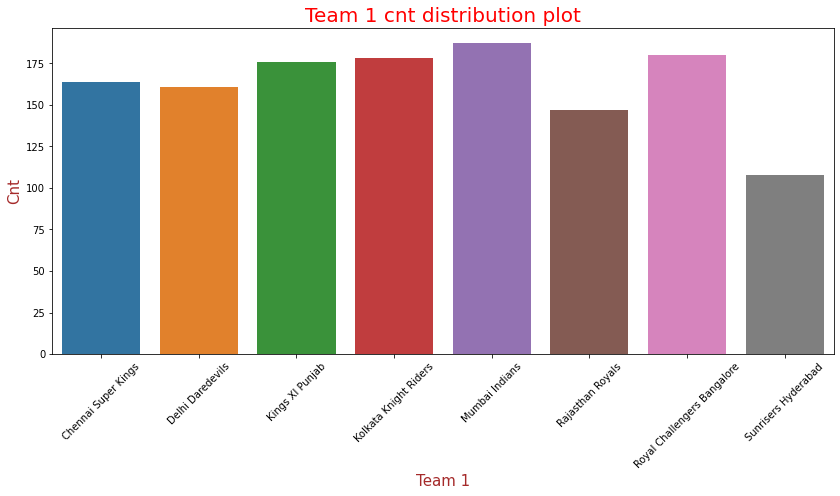

In [60]:
plt.figure(figsize = (14,6))
sns.barplot(x = genre_top_10.index, y = genre_top_10.cnt)
plt.xticks(rotation = 45)
plt.title ('Team 1 cnt distribution plot', fontsize = 20, color = 'red' )
plt.xlabel('Team 1', fontsize = 15, color ='brown')
plt.ylabel('Cnt', fontsize = 15, color ='brown')
plt.show()

## 3.3

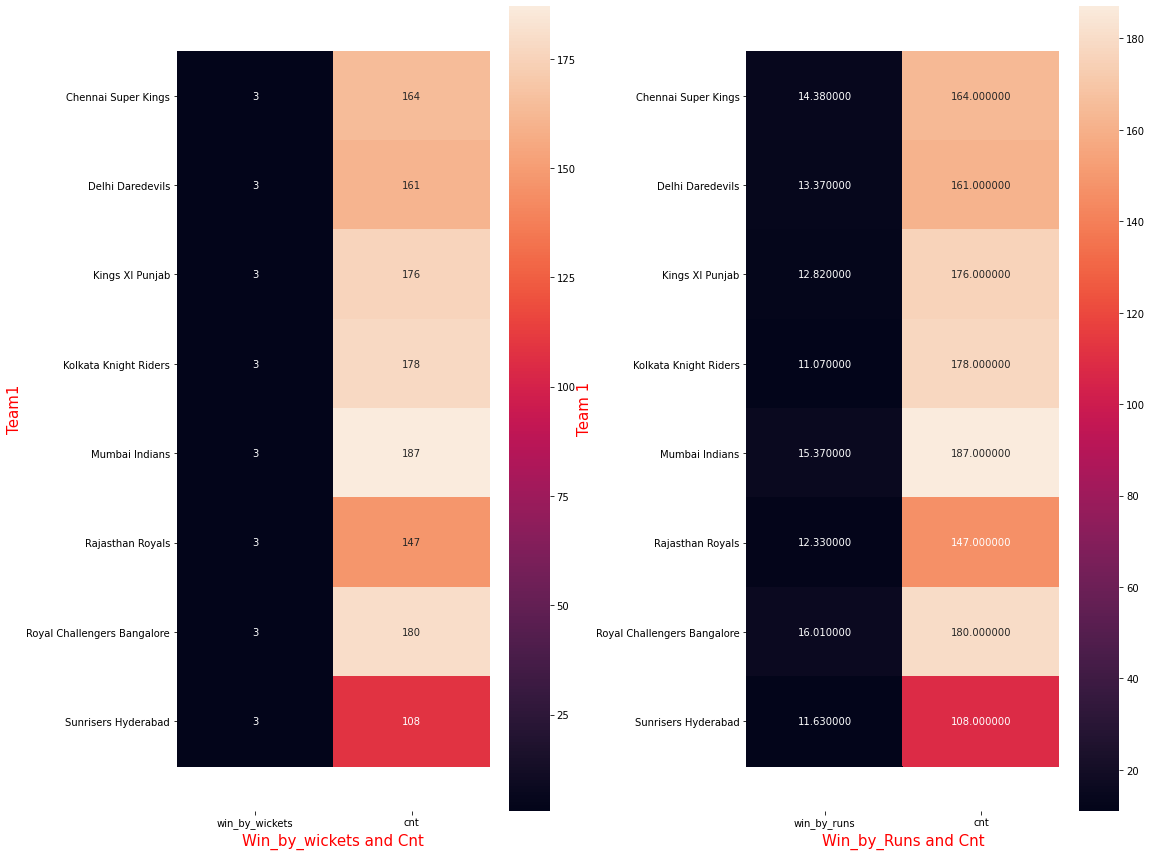

In [56]:
plt.figure(figsize = (16,12))

plt.subplot(1,2,1)
ax = sns.heatmap(genre_top_10[['win_by_wickets', 'cnt']], annot = True, fmt = 'd')
ax.set_xlabel('Win_by_wickets and Cnt', fontsize = 15, color= 'red')
ax.set_ylabel('Team1', fontsize = 15, color= 'red')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

plt.subplot(1,2,2)
ax = sns.heatmap(genre_top_10[['win_by_runs', 'cnt']], annot = True, fmt = 'f')
ax.set_xlabel('Win_by_Runs and Cnt', fontsize = 15, color= 'red')
ax.set_ylabel('Team 1', fontsize = 15, color= 'red')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)


plt.tight_layout()

In [61]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 3.5

Text(0.5, 0, 'Toss_decision')

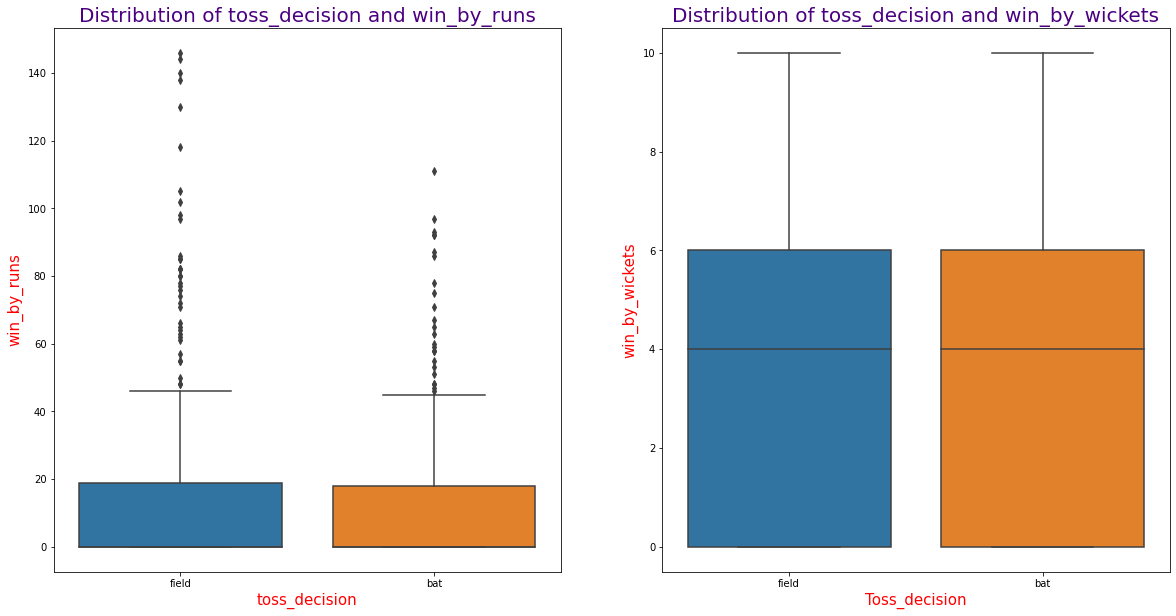

In [69]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
b1 = sns.boxplot(x = 'toss_decision', y = 'win_by_runs', data = ipl)
b1.axes.set_title ('Distribution of toss_decision and win_by_runs', fontsize=20, color='indigo')
b1.set_ylabel('win_by_runs', fontsize =15, color= 'red')
b1.set_xlabel('toss_decision', fontsize=15, color='red')

plt.subplot(1,2,2)
b2 = sns.boxplot(x = 'toss_decision', y = 'win_by_wickets', data = ipl)
b2.axes.set_title ('Distribution of toss_decision and win_by_wickets', fontsize=20, color='indigo')
b2.set_ylabel('win_by_wickets', fontsize =15, color= 'red')
b2.set_xlabel('Toss_decision', fontsize=15, color='red')

## 2.4

In [70]:
top_trio = ipl.head()

In [71]:
top_trio[['team1', 'team2', 'toss_winner']].values.tolist()

[['Sunrisers Hyderabad',
  'Royal Challengers Bangalore',
  'Royal Challengers Bangalore'],
 ['Mumbai Indians', 'Rising Pune Supergiant', 'Rising Pune Supergiant'],
 ['Gujarat Lions', 'Kolkata Knight Riders', 'Kolkata Knight Riders'],
 ['Rising Pune Supergiant', 'Kings XI Punjab', 'Kings XI Punjab'],
 ['Royal Challengers Bangalore',
  'Delhi Daredevils',
  'Royal Challengers Bangalore']]